# [Prediksi Jumlah Visitor pada Barbershop - Inalyst](https://inalyst.id/competition/86de3dd2-541a-419a-8225-c9add9414f7f/overview)

Yogi Anggara

[![](https://img.shields.io/badge/Github-black?&logo=github)](https://github.com/YogiAnggara129)
[![](https://img.shields.io/badge/Linkedin-blue?&logo=linkedin)](https://www.linkedin.com/in/yogi-anggara/)
[![](https://img.shields.io/badge/Instagram-white?&logo=instagram)](https://www.instagram.com/yogianggara52/)
[![](https://img.shields.io/badge/Mail-white?&logo=gmail)](mailto:yogianggaraaa@gmail.com)

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Sebelum melakukan langkah lebih lanjut, tanggal harus dirubah ke dalam bentuk date time terlebih dahulu.

In [2]:
df_transaction = pd.read_csv('data/Data_Transaksi_Barber.csv')
df_transaction['Tanggal'] = pd.to_datetime(df_transaction['Tanggal'], format='%d/%m/%Y')
df_transaction.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
0,1.0,26908171Haety,baru,1.0,irh,senin,2021-08-16,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2.0,26924970Riand,baru,1.0,irh,senin,2021-08-16,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,3.0,25789556Buawa,baru,1.0,irh,senin,2021-08-16,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
3,4.0,26770753Litan,baru,1.0,irh,selasa,2021-08-17,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
4,5.0,26770753Tatan,baru,1.0,irh,selasa,2021-08-17,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


Data yang akan diolah lebih lanjut untuk saat ini hanya tanggal (hari, bulan, tahun) dan jumlah kostumer per harinya. Frekuensi pada tanggal diinisialisasi sebagai data harian. Tanggal yang jumlah kostumernya NA akan diisi menggunakan data kostumer di hari sebelumnya.

In [3]:
df_count_cust = df_transaction[['Tanggal', 'id_cust']].groupby(['Tanggal']).count()
df_count_cust['day_name'] = df_count_cust.index.day_name()
df_count_cust['month'] = df_count_cust.index.month
df_count_cust['year'] = df_count_cust.index.year
df_count_cust['day_name'] = pd.Categorical(df_count_cust['day_name'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_count_cust = df_count_cust.set_index(df_count_cust.index).asfreq('D').fillna(method='ffill')
df_count_cust

,id_cust,day_name,month,year
Tanggal,,,,
2021-08-16,3.0,Monday,8.0,2021.0
2021-08-17,5.0,Tuesday,8.0,2021.0
2021-08-18,5.0,Wednesday,8.0,2021.0
2021-08-19,3.0,Thursday,8.0,2021.0
2021-08-20,3.0,Thursday,8.0,2021.0
...,...,...,...,...
2022-03-27,13.0,Sunday,3.0,2022.0
2022-03-28,16.0,Monday,3.0,2022.0
2022-03-29,8.0,Tuesday,3.0,2022.0


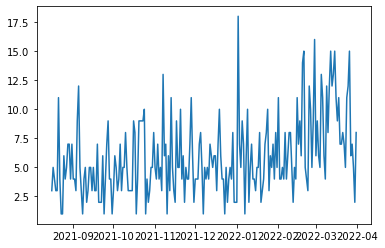

In [14]:
df_count_cust_new = df_transaction[df_transaction['Status'] == 'baru'][['Tanggal', 'id_cust']].groupby([
                                                               'Tanggal']).count()
df_count_cust_new['day_name'] = df_count_cust_new.index.day_name()
df_count_cust_new['month'] = df_count_cust_new.index.month
df_count_cust_new['year'] = df_count_cust_new.index.year
df_count_cust_new['day_name'] = pd.Categorical(df_count_cust_new['day_name'], [
                                           'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_count_cust_new = df_count_cust_new.set_index(
    df_count_cust_new.index).asfreq('D').fillna(method='ffill')
plt.plot(df_count_cust_new['id_cust'])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only s

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='id_cust'>)

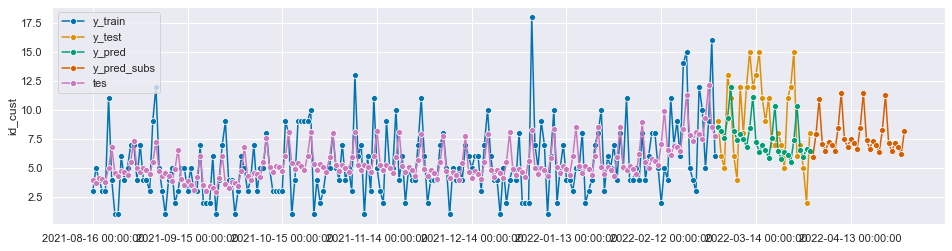

In [21]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})

y = df_count_cust_new['id_cust']
y_train, y_test = temporal_train_test_split(y, test_size=30)
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
fh_subs = len(y_test.index) + np.arange(1, 31)

forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Indonesia'},
    yearly_seasonality=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh_abs)
y_pred_subs = forecaster.predict(fh=fh_subs)

plot_series(y_train, y_test, y_pred, y_pred_subs, forecaster.predict(fh=-np.arange(len(y_train))), labels=[
            "y_train", "y_test", "y_pred", 'y_pred_subs', 'tes'])


In [19]:
forecaster.predict(fh=-np.arange(200))

c:\ProgramData\Miniconda3\lib\site-packages\sktime\forecasting\base\_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

2021-08-14     4.382484
2021-08-15     6.106714
2021-08-16     3.974557
2021-08-17     3.692728
2021-08-18     4.140072
                ...    
2022-02-25     7.492890
2022-02-26     9.297855
2022-02-27    12.113116
2022-02-28     8.489228
2022-03-01     7.780180
Length: 200, dtype: float64

In [23]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(y_train, forecaster.predict(fh=-np.arange(len(y_train))))


c:\ProgramData\Miniconda3\lib\site-packages\sktime\forecasting\base\_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

0.5598226211108656

In [13]:
df_regular_cust = df_transaction
df_regular_cust['is_new'] = df_regular_cust['Status'] == 'baru'
df_regular_cust['is_old'] = df_regular_cust['Status'] == 'lama'
df_regular_cust = df_regular_cust[['id_cust', 'is_new', 'is_old']].groupby('id_cust').sum()
df_regular_cust = df_regular_cust[(df_regular_cust['is_new'] == 1) & (df_regular_cust['is_old'] > 0)]
df_regular_cust.reset_index(inplace=True)
df_regular_cust = pd.merge(df_transaction, df_regular_cust, on='id_cust')
df_regular_cust

df_regular_cust.to_csv('data/regular_cust.csv')

In [12]:
df_regular_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Urutan         903 non-null    float64       
 1   id_cust        903 non-null    object        
 2   Status         903 non-null    object        
 3   Cukur_ke       890 non-null    float64       
 4   Capster        903 non-null    object        
 5   Hari           903 non-null    object        
 6   Tanggal        903 non-null    datetime64[ns]
 7   keterangan     0 non-null      object        
 8   Bayar          903 non-null    object        
 9   Haircut        903 non-null    int64         
 10  Haircolor      17 non-null     float64       
 11  Creambath      4 non-null      float64       
 12  Shaving        8 non-null      float64       
 13  Vitamin        4 non-null      float64       
 14  Powder A       14 non-null     float64       
 15  Powder B       3 non-nu

In [6]:
df_temp[(df_temp['is_new'] == 1) & (df_temp['is_old'] > 0)]

,is_new,is_old
id_cust,,
2547123BoBow,1,3
2547561Iwgny,1,3
254759DiDia,1,1
2547604AnAnd,1,1
2547607AmAmi,1,3
...,...,...
Baagu,1,2
BiBim,1,1
Diick,1,1


# EDA

<AxesSubplot:xlabel='day_name', ylabel='id_cust'>

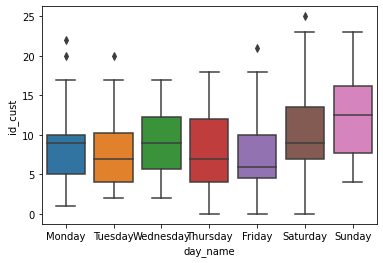

In [46]:
sns.boxplot(x="day_name", y="id_cust", data=df_count_cust)

Berdasarkan box plot di atas, nampak bahwa jumlah konsumer di hari Minggu relatif lebih banyak dibandingkan dengan hari-hari lainnya (dapat dilihat berdasarkan nilai median dan range datanya). Ini masuk akal, sebab rata-rata orang-orang libur di hari minggu. 

Meskipun hari Sabtu termasuk "Weekend" seperti halnya hari Minggu, akan tetapi mediannya hampir sama dengan hari-hari "Weekday" lainnya. Hal ini mungkin disebabkan rata-rata kostumer terletak di segmen anak sekolah, yang mana seperti yang kita tahu bahwa rata-rata anak sekolah melakukan kegiatan ekstrakurikuler di hari Sabtu. 

<AxesSubplot:xlabel='year', ylabel='id_cust'>

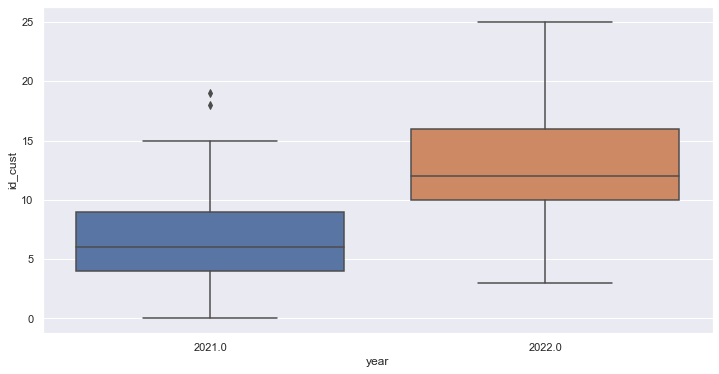

In [196]:
sns.boxplot(x="year", y="id_cust", data=df_count_cust)


Berdasarkan boxplot di atas, nampak bahwa jumlah kostumer relatif banyak di tahun 2022 dibandingkan di tahun 2021. Hal ini bisa jadi disebabkan karena di tahun 2021 masih sering diadakan PSBB.

<AxesSubplot:xlabel='month', ylabel='id_cust'>

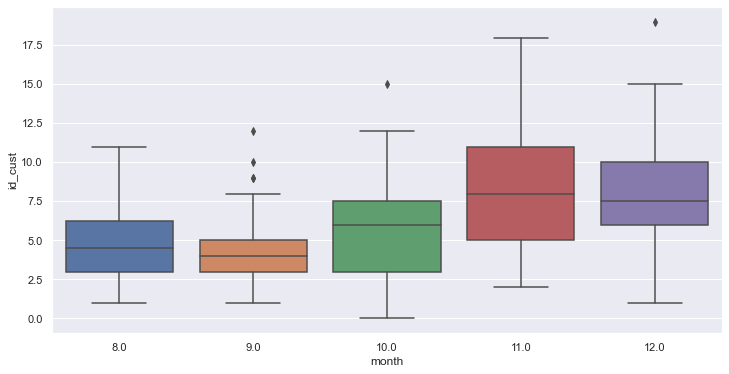

In [195]:
sns.boxplot(x="month", y="id_cust", data=df_count_cust[df_count_cust['year']==2021])

Pada tahun 2021, dapat dilihat bahwa jumlah kostumer secara bertahap mulai naik tiap bulannya. Penambahan jumlah kostumer ini turut naik beriringan dengan pengurangan level PSBB.

<AxesSubplot:xlabel='month', ylabel='id_cust'>

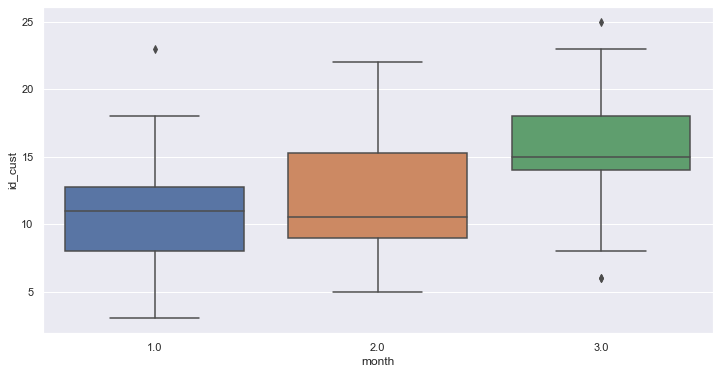

In [197]:
sns.boxplot(x="month", y="id_cust", data=df_count_cust[df_count_cust['year']==2022])

Berdasarkan boxplot di atas, nampak bahwa tren naik ini terus berlanjut pada tahun 2022

(0.0, 150.0)

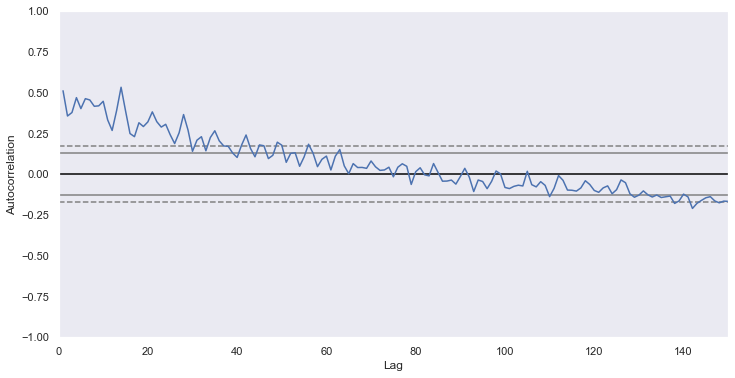

In [194]:
pd.plotting.autocorrelation_plot(df_count_cust['id_cust']).set_xlim([0, 150])


Berdasarkan ACF di atas, nampak bahwa penurunan autokorelasi terjadi secara perlahan. Hingga akhirnya autokorelasi tidak signifikan di lag 40-an. Hal ini menunjukan bahwa data harian jumlah konsumer tidak stasioner. Kemudian, dapat dilihat pula terdapat pola pada plot ACF pada lag dengan kelipatan 14. Ini menunjukan bahwa data memiliki pola musiman bulanan (dibulatkan).

Nampak bahwa 

# Build Model

Pada percobaan ini, model yang akan dievaluasi adalah ARIMA dan fbProphet. ARIMA merupakan model yang sering digunkana untuk peramalan. FBprophet merupakan model time series yang memang dikhusukan untuk data bisnis.

## ARIMA dengan Auto ARIMA

c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='id_cust'>)

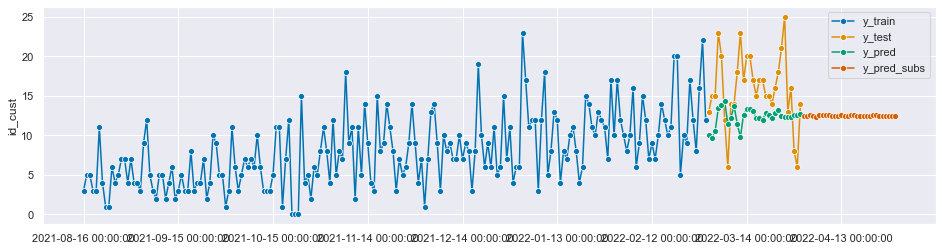

In [201]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})

y = df_count_cust['id_cust']
y_train, y_test = temporal_train_test_split(y, test_size=30)
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
fh_subs = len(y_test.index) + np.arange(1, 31)

forecaster = AutoARIMA(d=1, sp=12, suppress_warning=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh_abs)
y_pred_subs = forecaster.predict(fh=fh_subs)

plot_series(y_train, y_test, y_pred, y_pred_subs, labels=["y_train", "y_test", "y_pred", 'y_pred_subs'])


In [202]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(y_test, y_pred)


c:\ProgramData\Miniconda3\lib\site-packages\sktime\performance_metrics\forecasting\_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.32004338663160775

## FBprophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only s

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='id_cust'>)

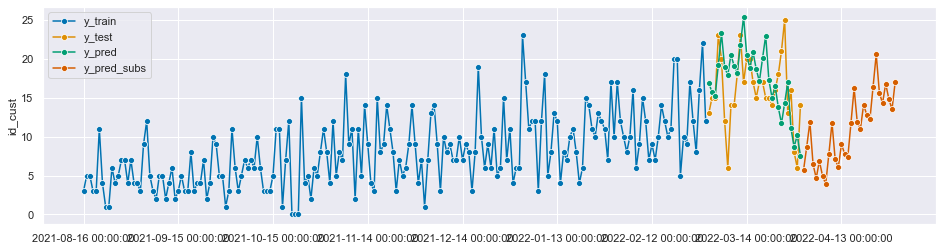

In [26]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})

y = df_count_cust['id_cust']
y_train, y_test = temporal_train_test_split(y, test_size=30)
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
fh_subs = len(y_test.index) + np.arange(1, 31)

forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Indonesia'},
    yearly_seasonality=True)
    
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh_abs)
y_pred_subs = forecaster.predict(fh=fh_subs)

plot_series(y_train, y_test, y_pred, y_pred_subs, labels=[
            "y_train", "y_test", "y_pred", 'y_pred_subs'])


In [46]:
e = y - forecaster.predict( np.concatenate((np.arange(-len(y_train), 0), np.arange(len(y_test)+1)), axis=None)
)

c:\ProgramData\Miniconda3\lib\site-packages\sktime\forecasting\base\_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [20]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(y_test, y_pred)


c:\ProgramData\Miniconda3\lib\site-packages\sktime\performance_metrics\forecasting\_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.3041767672328784

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only s

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='id_cust'>)

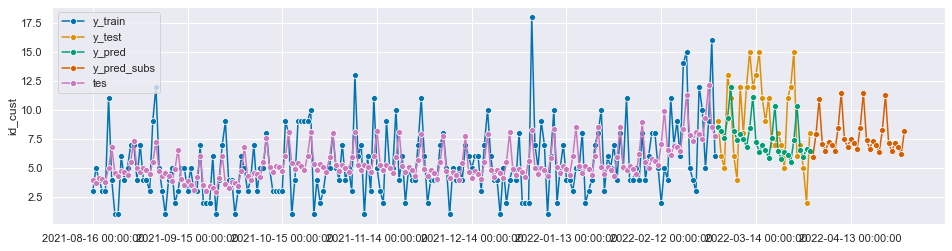

In [48]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})

y = df_count_cust_new['id_cust']
y_train, y_test = temporal_train_test_split(y, test_size=30)
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)
fh_subs = len(y_test.index) + np.arange(1, 31)

forecaster2 = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Indonesia'},
    yearly_seasonality=True)

forecaster2.fit(y_train)
y_pred = forecaster2.predict(fh=fh_abs)
y_pred_subs = forecaster2.predict(fh=fh_subs)

plot_series(y_train, y_test, y_pred, y_pred_subs, forecaster2.predict(fh=-np.arange(len(y_train))), labels=[
            "y_train", "y_test", "y_pred", 'y_pred_subs', 'tes'])


Berdasarkan nilai MAPE, dapat dilihat bahwa FBprophet lebih unggul dibandingkan dengan ARIMA. Selain itu, nampak bahwa ARIMA tidak mampu memprediksi data pada rentang waktu yang lebih jauh. Dengan demikian, pada percobaan ini model yang akan dipilih adalah FBprophet. Berikutnya akan dilakukan hyperparameter tuning.

## Hyperparameter Tuning

In [4]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.fbprophet import Prophet

y = df_count_cust['id_cust']

forecaster = Prophet(add_country_holidays={'country_name': 'Indonesia'})

param_grid = {'growth': ['linear', 'logistic'],
              'seasonality_mode': ['additive', 'multiplicative']}

cv = ExpandingWindowSplitter(
    start_with_window=True,
    fh=[1,2,3])

gscv = ForecastingGridSearchCV(
    forecaster=forecaster,
    param_grid=param_grid,
    cv=cv)

gscv.fit(y)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 7.
c:\ProgramData\Miniconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
c:\ProgramData\Miniconda3\lib\site-packages\prophet\f

KeyboardInterrupt: 

## Simpulan

In [184]:
df_subs = pd.DataFrame(dict(value=y_pred_subs))
df_subs['id'] = df_subs.index
df_subs = df_subs[['id', 'value']]
df_subs.to_csv('data/subs_barber_yogi.csv', index=False)
df_subs


,id,value
2022-04-01,2022-04-01,5.723814
2022-04-02,2022-04-02,8.708371
2022-04-03,2022-04-03,11.878204
2022-04-04,2022-04-04,6.448291
2022-04-05,2022-04-05,4.651200
2022-04-06,2022-04-06,6.860763
2022-04-07,2022-04-07,4.966969
2022-04-08,2022-04-08,3.904421
2022-04-09,2022-04-09,7.734457
2022-04-10,2022-04-10,11.759177
